In [99]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [110]:
# Importing the dataset 
dataset = pd.read_csv('Position_Salaries.csv') 
X = dataset.iloc[:, 1:2].values 
y = dataset.iloc[:, 2].values
print(dataset)
#print (X)
print (y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [101]:
# y = y.reshape(-1,1)

In [98]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X_s = sc_X.fit_transform(X) 
y_s = sc_y.fit_transform(y.reshape(-1, 1))

# print("Scaled X:")
# print(X)
# print("Scaled y:")
print(y)
print(y_s)

Scaled X:
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


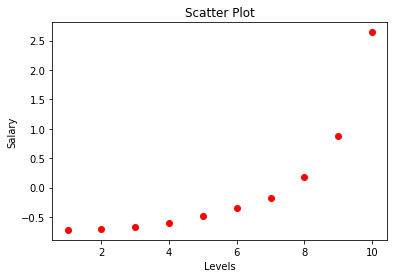

In [93]:
plt.scatter(X, y_s, color = 'red') # plotting the training set
plt.title('Scatter Plot') 
plt.xlabel('Levels') # x-axis
plt.ylabel('Salary') # y-axis
plt.show()

In [103]:
# Fitting SVR to the dataset 
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf') 
regressor.fit(X_s, y_s)


C:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [80]:
#y

In [105]:
# # Predicting a new result 
# y_pred = regressor.predict([[6.5]])
# y_pred = sc_y.inverse_transform(y_pred)
A=regressor.predict(sc_X.transform([[6.5]]))
print(A)

[-0.27861589]


In [106]:
A

array([-0.27861589])

In [107]:
#1D to 2D array 
A = A.reshape(-1,1)
A

array([[-0.27861589]])

In [108]:
A_pred = sc_y.inverse_transform(A)
print(A_pred)

[[170370.0204065]]


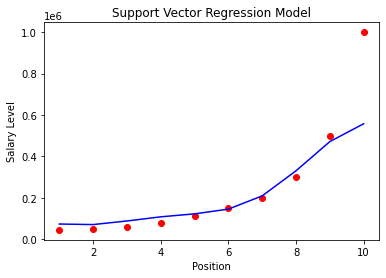

In [111]:
# inverse the transformation to go back to the initial scale
plt.scatter(sc_X.inverse_transform(X_s), sc_y.inverse_transform(y_s), color = 'red')
plt.plot(sc_X.inverse_transform(X_s), sc_y.inverse_transform(regressor.predict(X_s).reshape(-1,1)), color = 'blue')
# add the title to the plot
plt.title('Support Vector Regression Model')
# label x axis
plt.xlabel('Position')
# label y axis
plt.ylabel('Salary Level')
# print the plot
plt.show()